# **Detecting Antibiotic Resistant Bacteria from DNA**

## **Learning Outcomes**

Throughout this exercise, you will:
- Apply your new knowledge on binary classification to create a medical diagnostic model
- Perform data pre-processing and visualization
- Develop and train different classifiers with Sklearn
- Tune the models' hyperparameters
- Evaluate the performance of your  models using the proper metrics
- Apply AI explainability principles by investigating the model to understand its predictions


---


## **Antimicrobial resistance (AMR)**
* Antimicrobial Resistance (AMR) occurs when bacteria, viruses, fungi and parasites evolve over time and no longer respond to medicines making infections harder to treat and increasing the risk of disease spread, severe illness and death.
* As a result of drug resistance, antibiotics and other antimicrobial medicines become ineffective and infections become increasingly difficult or impossible to treat.
* AMR is one of the top 10 global public health threats facing humanity according to the World Health Organization.
* According to the World Bank, each year, 700,000 people die of AMR. Without action, the death toll could rise even higher, to cause as many as 10 million deaths annually by 2050.


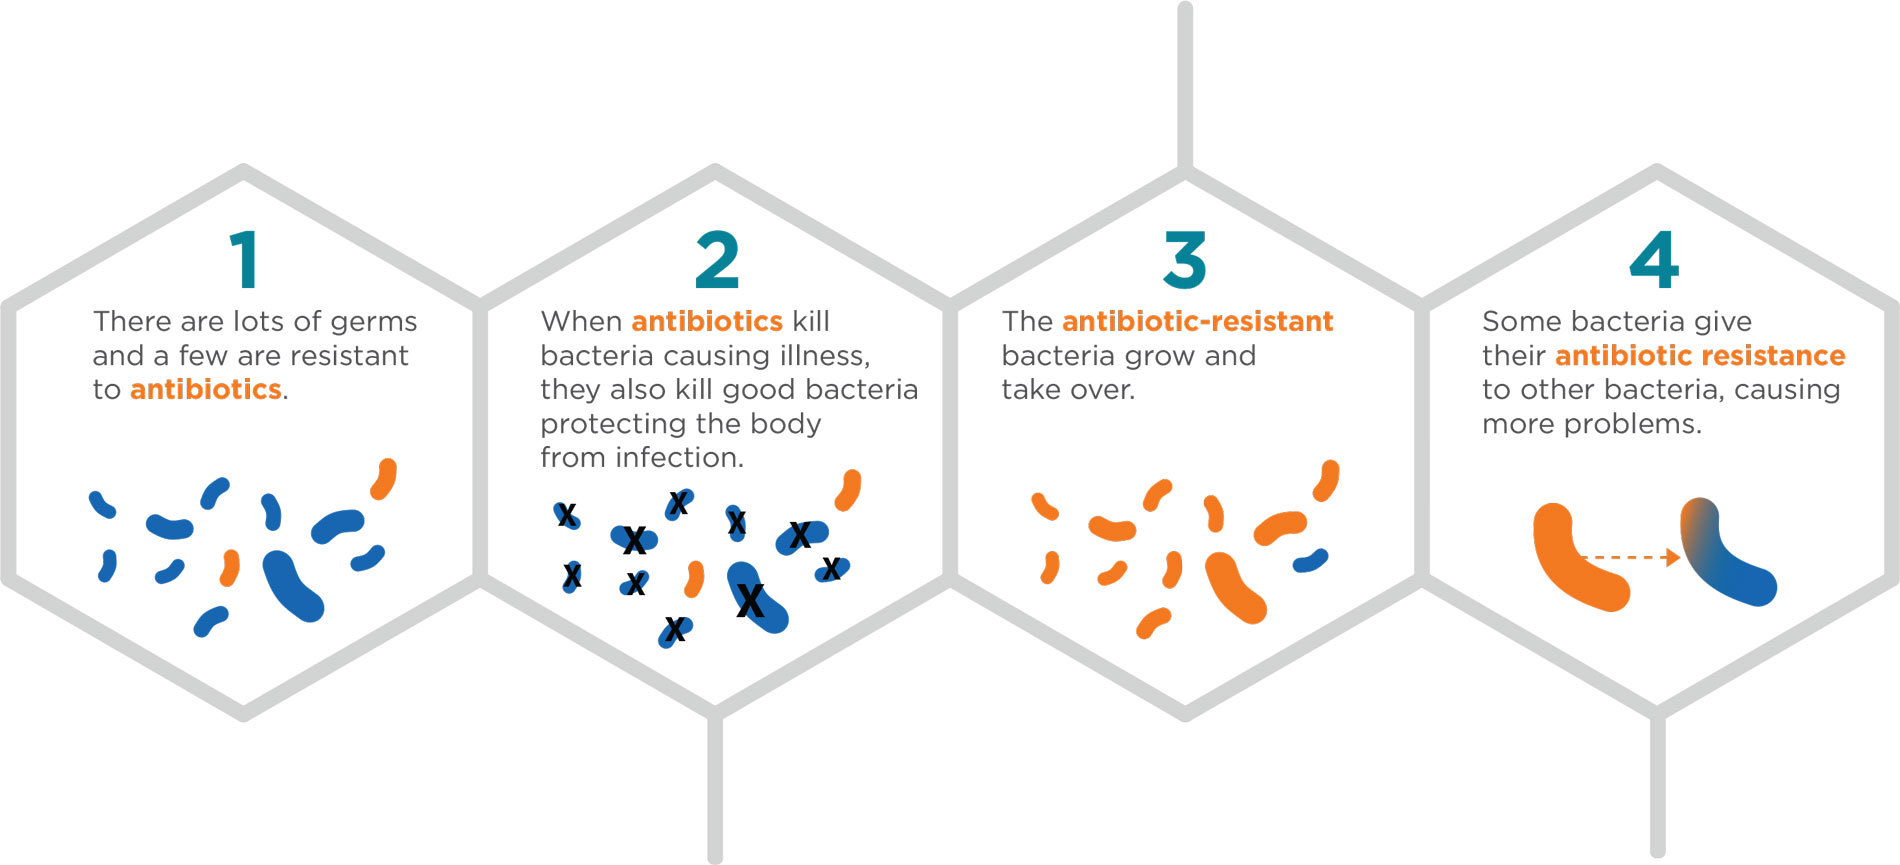

Image Source:National Centre for Infectious Diseases Website


## **Dataset Description**
The dataset you will use is publically available on Kaggle; it focuses on a species of bacteria called Neisseria. Previously, patients infected with Neisseria bacteria were treated with an antibiotic called ***ciprofloxacin***. Doctors had to stop using this antibiotic because resistance to the drug was too common and this treatment option was failing. Currently, the recommended treatment for patients is using two drugs - ***ceftriaxone*** and ***azithromycin***. In February 2018, the first case of resistance to treatment with ceftriaxone and azithromycin was reported.

In this exercise, the goal is to use the available dataset to predict resistance.

The dataset consists of "unitigs", which are segments of DNA shared by a subset of the strains.

There is one unitig file (azm_sr_gwas_filtered_unitigs.Rtab):
* The file contains trimmed versions of the full unitig files.
* The file contains the unitigs that have resistance to ***azm*** (the azithromycin antibiotic).
* Each column in the file corresponds to a unitig. **1** indicates that the unitig is present while **0** means it is absent.

The metadata file contains:
* Phenotype data we will use for prediction.
* For this work, focus on predicting azmsr
* The sr variable corresponds to sensitive and resistant isolates. **1** corresponding to resistance and **0** corresponds to sensitivity to the antibiotic.

# **Importing the Antimicrobial Resistance Dataset**

First, let's import the libraries that we will need for this project:

* **Numpy** - for matrix/vectors manipulation and operations
* **Pandas** - for data handling
* **Matplotlib** - for visualizing various types of plots
* **Seaborn** -  for data visualization and statistical graphics
* **Sklearn** - for various classification, regression and clustering algorithms


In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Import the Logistic Regression and  Random Forest modules from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import learning_curve

Let us start by loading the dataset and saving it as a ***dataframe*** so we can easily manipulate the data.

In [7]:
def data(phenotype):
  # Read the metadata file
  phen = pd.read_csv('metadata.csv', index_col=0)

  # Drop the samples (rows) that don't correspond to the resistance profile we chose
  phen = phen.dropna(subset=[phenotype])
  phen = phen[phenotype]

  # Read the unitig data file
  X = pd.read_csv(phenotype + '_gwas_filtered_unitigs.Rtab', sep=" ", index_col=0, low_memory=False)
  X = X.transpose() # Transpose the data for easier data manipulation
  X = X[X.index.isin(phen.index)] # only keep rows with a resistance measure
  phen = phen[phen.index.isin(X.index)]

  return X, phen

In [8]:
# Prepare our data for predicting antibiotic resistance against the AZM drug
phenotype = 'azm_sr' # Specifying the type of drug we want to study
X, pheno = data(phenotype)
X.head() # Visualize our dataframe

pattern_id,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,TATATAAGGGGTTGCCGTTCCGCAGTTGGGCGGCAGCATAC,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
ERR1549286,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549290,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549291,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549287,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549288,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


Now that we have our dataset saved as a ***dataframe***, we are able to perform different manipulations and further explore our data.

Let us see the number of rows and columns there are in our dataset.

In [9]:
# See the number of rows and columns in the dataset
rows = X.shape[0]
columns = X.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 3478 rows and 515 columns.


You should see that we have **3478 rows** and **515 columns**.

Now, let us see some ***statistical details*** about the features inside our dataset:

In [10]:
# To see statistical details of the dataset
X.describe()

pattern_id,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,TATATAAGGGGTTGCCGTTCCGCAGTTGGGCGGCAGCATAC,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
count,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,...,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.0
mean,0.000288,0.000288,0.000863,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,0.000288,...,0.998562,0.998275,0.998275,0.998562,0.998562,0.997987,0.998562,0.998850,0.997987,1.0
std,0.016956,0.016956,0.029361,0.016956,0.016956,0.016956,0.016956,0.016956,0.016956,0.016956,...,0.037894,0.041505,0.041505,0.037894,0.037894,0.044824,0.037894,0.033898,0.044824,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


# **Data Exploration and Visualization**

Let's explore our data through visualizing it. There are many ways to visualize the data and we will be focusing on:
**Histogram**, which represents the distribution of a variables by counting the number of observations that fall within discrete bins.

## **Histogram**

[Text(0.5, 1.0, 'Distribution of the Unitigs')]

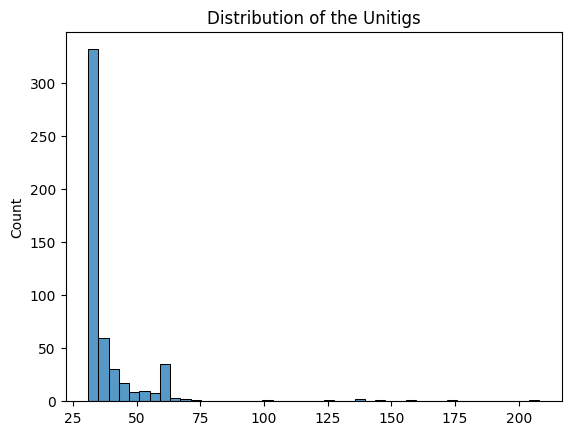

In [11]:
# Plot the distribution of the unitigs in our dataset
unitigs = X.columns
length = np.vectorize(len)
uni_len = length(unitigs)
sns.histplot(uni_len, binwidth=4).set(title='Distribution of the Unitigs')

In the graph we plotted above, the blue bins correspond the count for each unitig in our dataset. As seen above, one segment of DNA or "unitig" has the highest frequency (300) out of all our data.

# **Pre-processing**

In this section, we will perform the following:
* Data Cleaning
* Data Splitting

## **Data Cleaning**

We need to check if there are any missing values in our dataset since the model doesn't accept missing values or NaNs.

In [12]:
# Check the total number of missing values and perform any further necessary steps
missing=X.isnull().sum()
print(missing)
X_clean=X.dropna()

pattern_id
CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG                                                                                                0
TACCGTAACCGGCAATGCGGATATTACGGTC                                                                                                                0
CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG                                                                                                               0
AACGGGTTTTCAGACGGCATTCGATATCGGGACG                                                                                                             0
CCAAAAATTACCCGCGTTGACGTAGCTAAAGA                                                                                                               0
                                                                                                                                              ..
ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG                                                                                  

## **Splitting the Data**

In order to build our model, we need to split the data into ***features*** (X) and the ***outcome*** (y).

In [13]:
# Divide the data into "attributes" and "labels"
X = X # the features in our dataset
y = pheno # if the bacteria is resistant to the drug of choice or not

In order to build and evaluate our model, we need to split the data into training and testing sets.

In [14]:
# Split dataset in a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Logistic Regression Model**

Now, we will build the Logistic Regression Classifier, train it on the training set, and evaluate its peformance.

## **Training the Model**

We now need to train the classification model

In [15]:
# Train the model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

## **Evaluating the Model**

Let us see what the trained model predicts if given new data.

In [16]:
# Predict the response for test dataset
y_pred_log_reg = log_reg.predict(X_test)

Let us compare what the trained model predicted and what the data actually is.

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log_reg})
df.head(10)

,Actual,Predicted
Sample_ID,,
17428_7#18,0.0,0.0
SRR5827039,0.0,0.0
15335_5#47,0.0,0.0
15335_2#80,0.0,0.0
8727_5#86,0.0,0.0
10900_8#14,0.0,0.0
10868_8#76,0.0,0.0
17428_7#13,0.0,0.0
17138_1#49,0.0,0.0


## **Confusion Matrix**

One great tool for evaluating the behavior and understanding the effectiveness of a binary or categorical classifier is the **Confusion Matrix**. The confusion matrix is a 2 dimensional array comparing predicted category labels to the true label. For binary classification, these are the True Positive, True Negative, False Positive and False Negative categories.


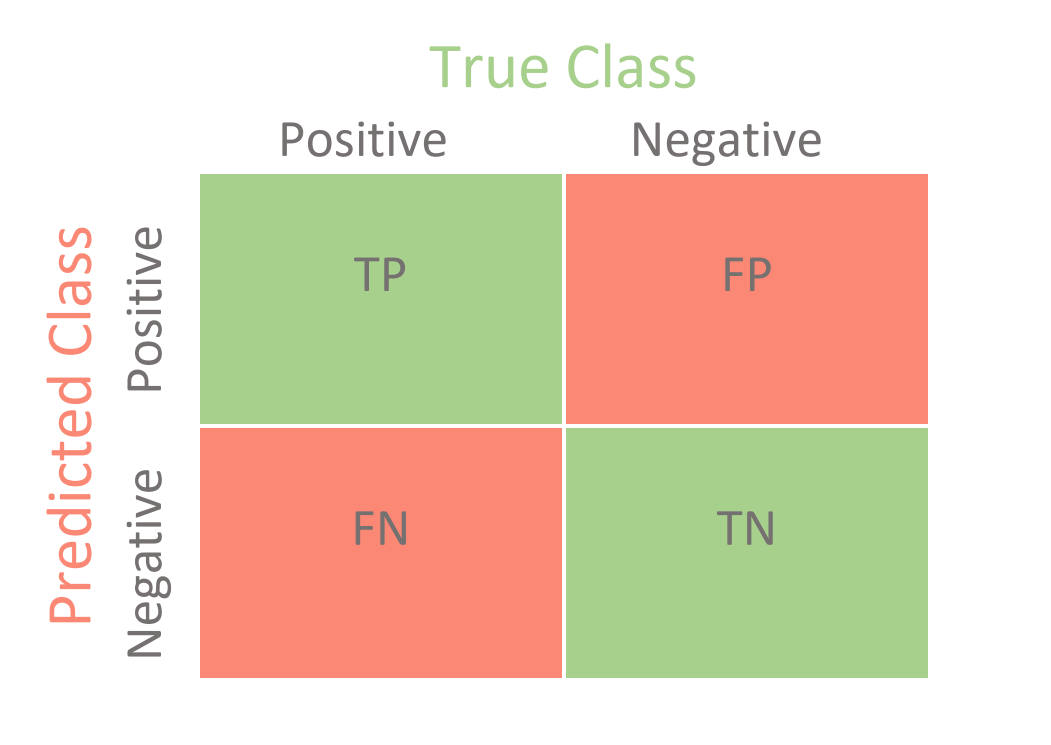

Image Source: Towards Data Science page "Confusion Matrix for Your Multi-Class Machine Learning Model"

Formulas Derived from the confusion matrix


*   **Accuracy**: percentage of correct predictions for the test data
*   **Recall**:  how many of the true positives were recalled (found)
*   **Precision**: measures the model's accuracy in classifying a sample as positive

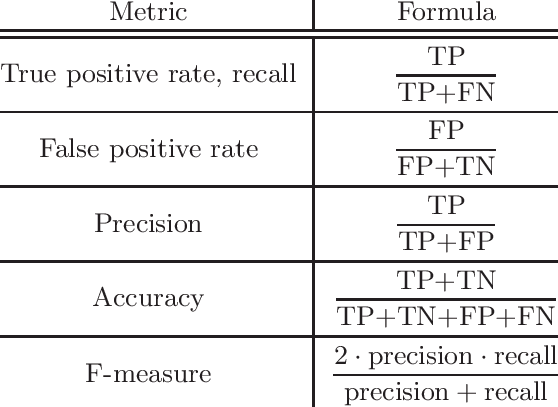


Image Source: DeepAI "Evaluation Metrics" page


Let us see what the confusion matrix of our model is.

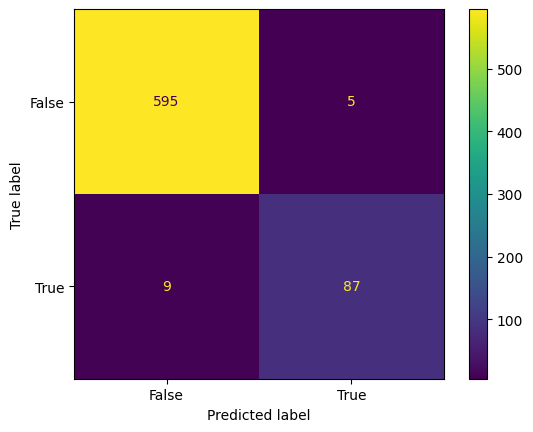

In [18]:
# Plot the Confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_log_reg )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

As seen above, fill in the blanks:
* 595 cases were correctly classified as non resistant bacteria
* 9 cases were incorrectly classified as non resistant bacteria
*87 cases were correctly classified as resistant bacteria
* 5 cases were incorrectly classified as resistant bacteria

## **Evaluation Metrics**

Now let us measure the classifier's: accuracy, precision, and recall

In [19]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_log_reg))

Accuracy: 0.9798850574712644


In [20]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test,y_pred_log_reg))

Precision: 0.9456521739130435


In [21]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test,y_pred_log_reg))

Recall: 0.90625


The **Area Under the Curve (AUC)** is another measure for the ability of a classifier to distinguish between classes. The higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. Similarly, the higher the AUC, the better the model is at distinguishing between patients with the disease and the ones with no disease.

Area Under the Curve

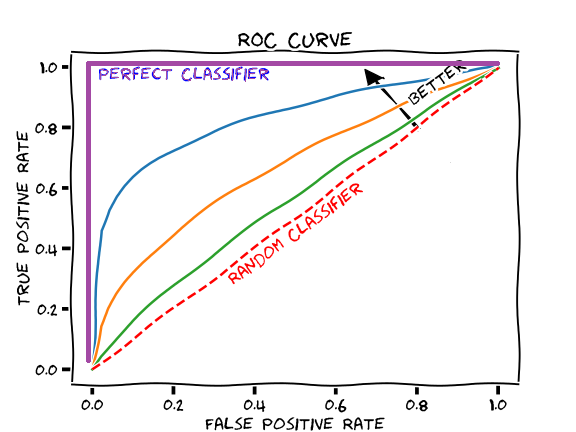

Image Source: GLASS BOX "Measuring Performance: AUC (AUROC)" page


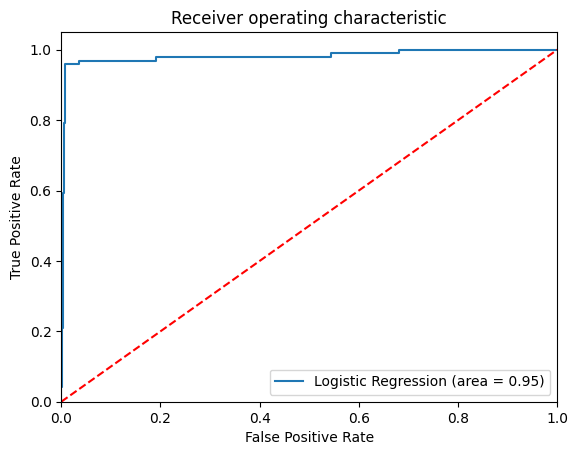

In [22]:
# Plot the ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Random Forest**


Now, we will build a Random Forest Classifier, train it on the training set, tune its hyperparameters, and evaluate its peformance.

In [23]:
# Define and train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

## **Tuning the Model**

In this part, we will tune our Random Forest classifier to choose the optimal hyperparameters such as the number of trees, depth level, etc. To tune these parameters we perform **Random Grid Search**, where we define a range of values from which the code can randomly pick and choose until it finds a set that performs the best.

In [30]:
# Define values for the hyperparameters for the search algorithm will search through

# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [31]:
# Start the Random Search on our training data
rf_random = RandomizedSearchCV(estimator = clf,
                               param_distributions = random_grid,
                               n_iter = 3, cv = 10,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=3, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20, 30],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   random_state=42, verbose=2)

In [32]:
# View the parameter values the random search found
rf_random.best_params_

{'n_estimators': 2171,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 200,
 'criterion': 'entropy',
 'bootstrap': True}

## **Evaluating the Model**

Let us see what the trained model predicts if given new data.

In [33]:
# Evaluate the new tuned model
y_pred_rf_tuned = rf_random.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_tuned))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred_rf_tuned))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred_rf_tuned))

Accuracy: 0.9698275862068966
Precision: 0.9518072289156626
Recall: 0.8229166666666666


Based on the results above, the Random Forest and Logistic regression have similar performance except when it comes to the recall mteric, where the Logistic Regression outperforms the Random Forest.

## **Explaining the Model's Prediction**

An interesting insight we can gain from a random forest is to explore what features the model ‘thinks’ are most important in determining its final predictions.

In [34]:
pd.DataFrame(clf.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
pattern_id,
GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG,0.231377
AAAGGCGTTTGCGTTGCGAGGAGTTCATATC,0.038254
AACATCAGGAAAACGGCACATTCCACGCCGT,0.035022
CATCTGCCTGGCAAACGCTTCCCCGTCGCCCTCGAA,0.032507
TCATCTCGTATGCCGTCTTCTGCTTGAAAAA,0.029190
...,...
CGGCGTCGTCTTTGACGGCGTCGTCGGCGTC,0.000000
ATATCCCCAGTTTGTTTGTTGAAAAACTGCA,0.000000
"ACAAACTGGGGATATTATATGCATATCCTTC,AGCGAATGATGAAAGCCTTAACGCCCTTGGGCGAAAGG,CGAATGCCGTCTGAAAACCCGTTGACGGCGC",0.000000


What was the unitig that had the most impact in the final decision? And how much was that unitig's effect on the model's decision?

Based on the result:
GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG
 With an effect of 0.231377